<h2> Load Data</h2>

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import preparers
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
data = preparers.load_queried(
    participant_number=1,
    snippets=["BogoSort", "Ackerman"],
    query_code=True,
    query_eeg=True,
    query_eye_tracking=True,
    query_behavioral=True,
    query_log=True,
    query_input=True,
    query_meta=True,
)

Loading Ackerman Files .........
Loading BogoSort Files .........


In [3]:
raw_eeg = data["BogoSort"]["Code"]["EEG"]

In [4]:
import mne

mne.channels.read_custom_montage("./AC-64.bvef")

<DigMontage | 0 extras (headshape), 0 HPIs, 0 fiducials, 66 channels>

<ipython-input-5-e2a50d07c0a9>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_eeg.plot_psd(fmax=50)


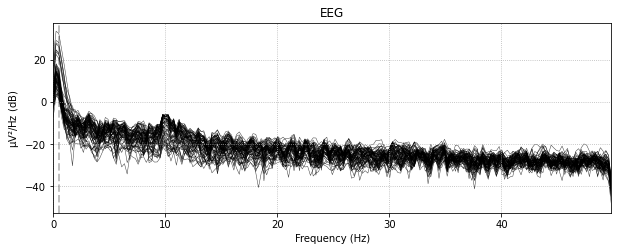

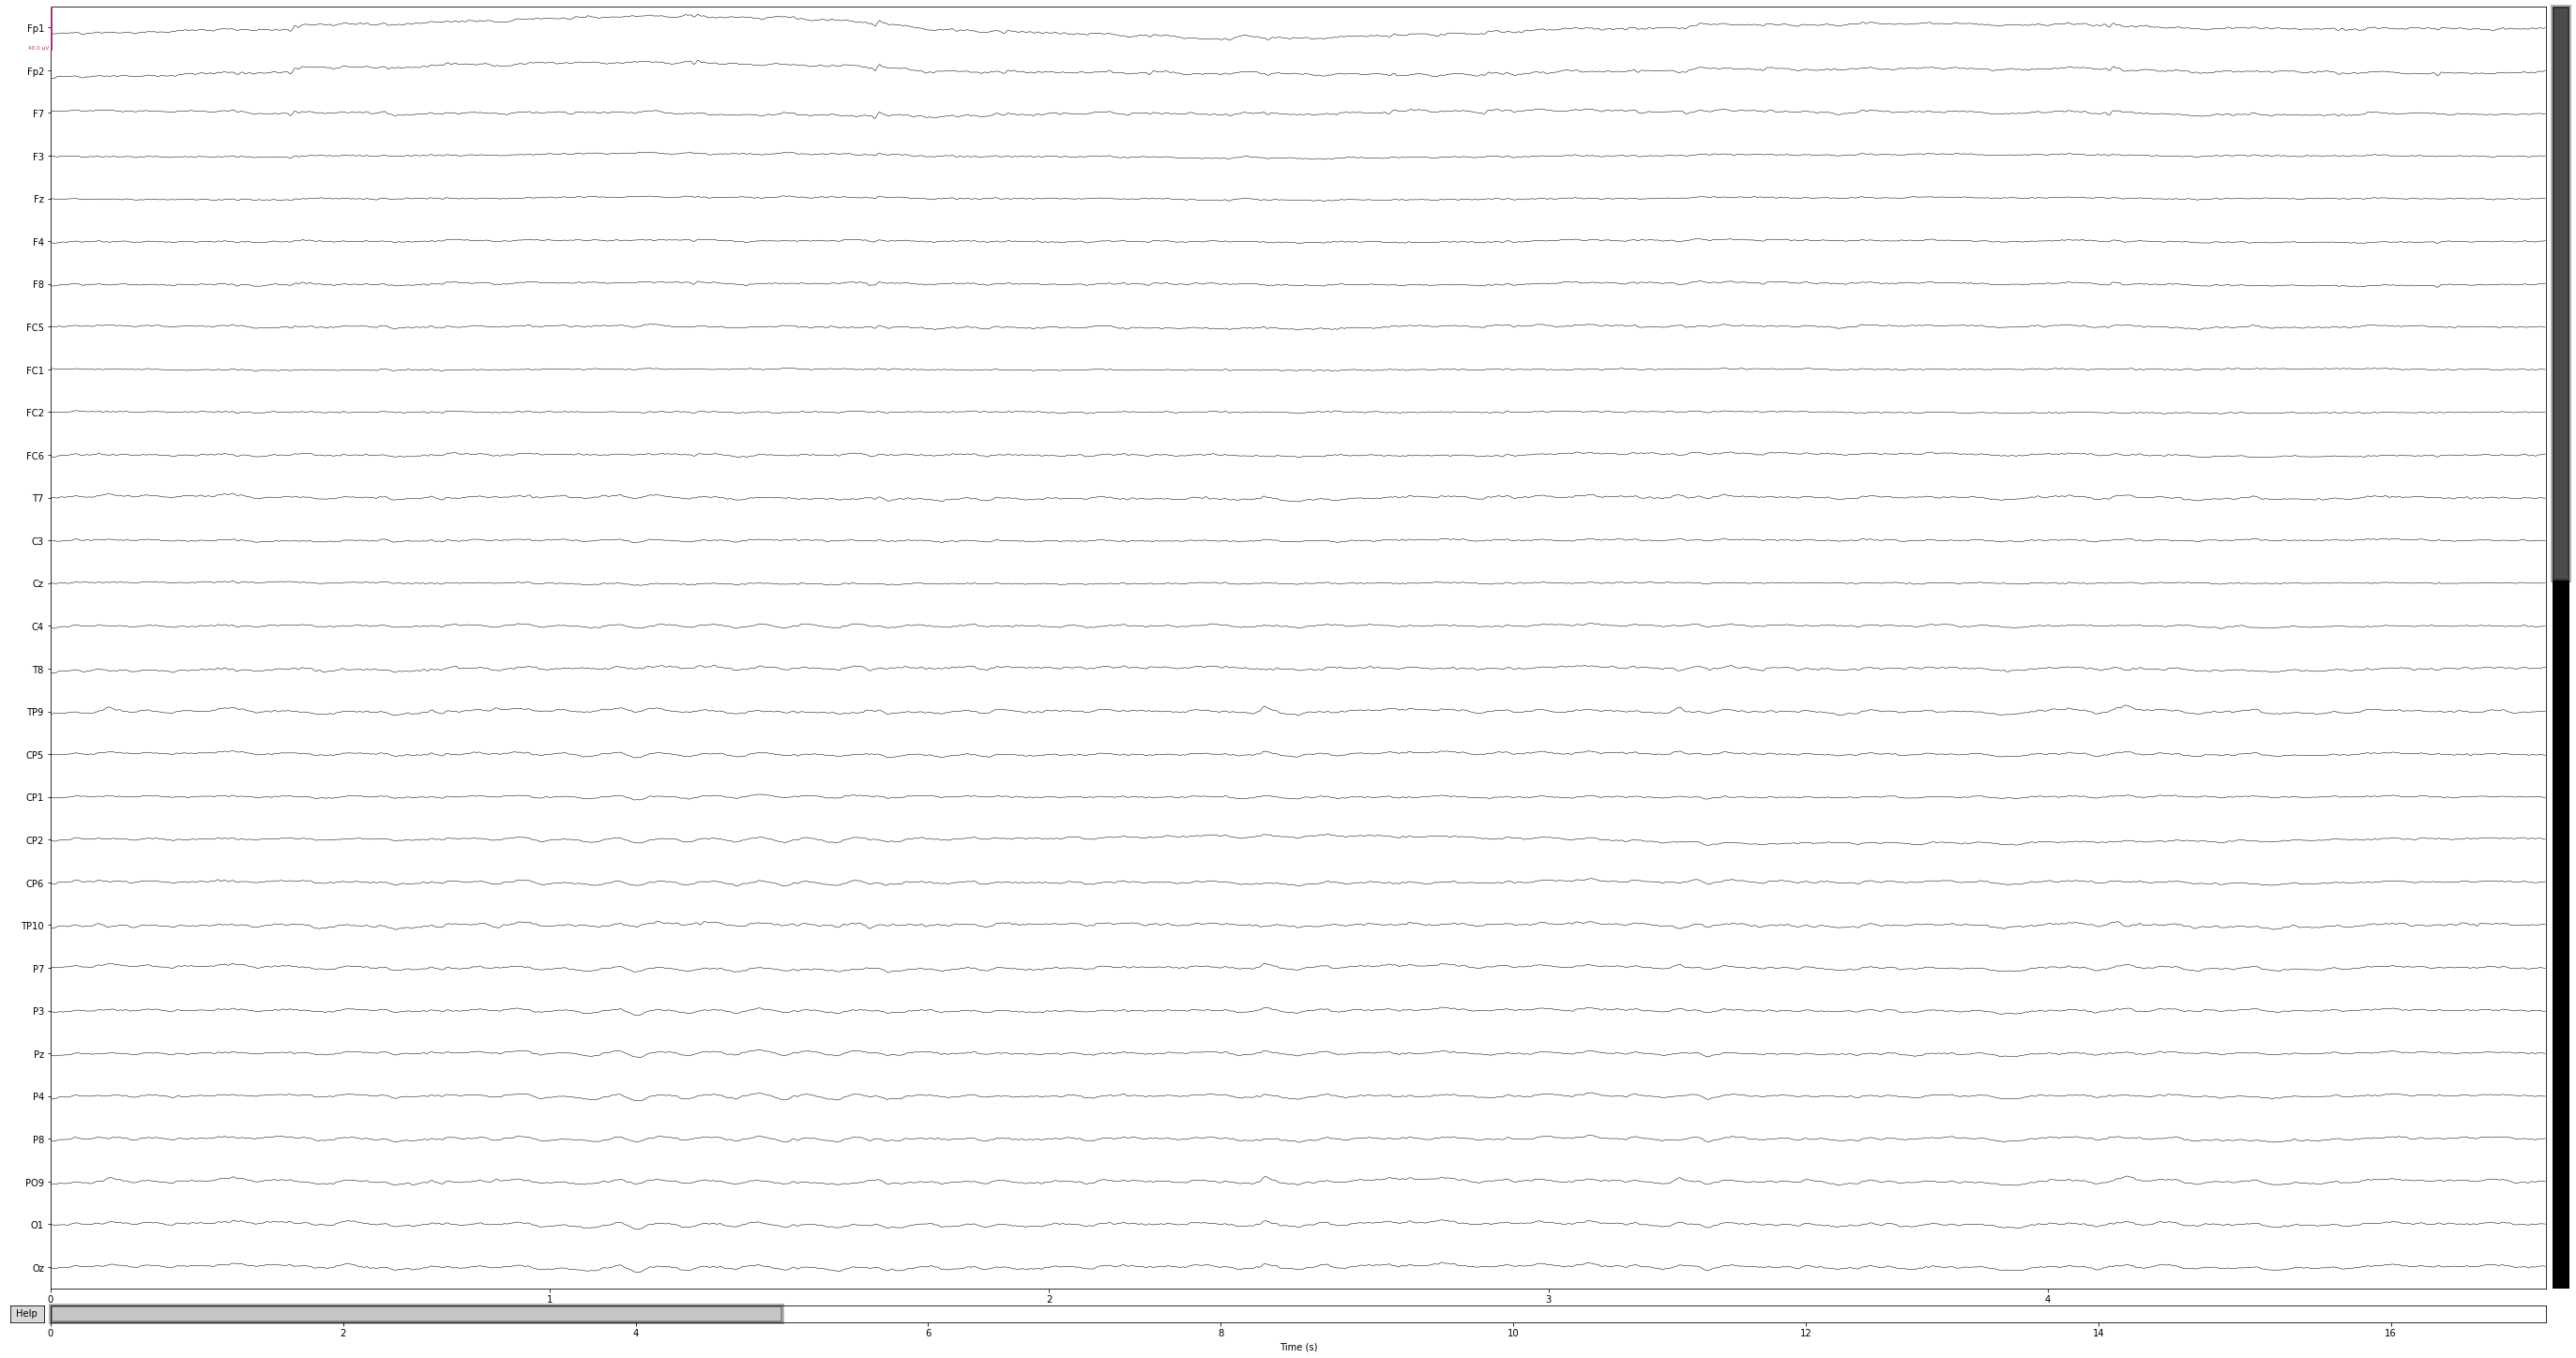

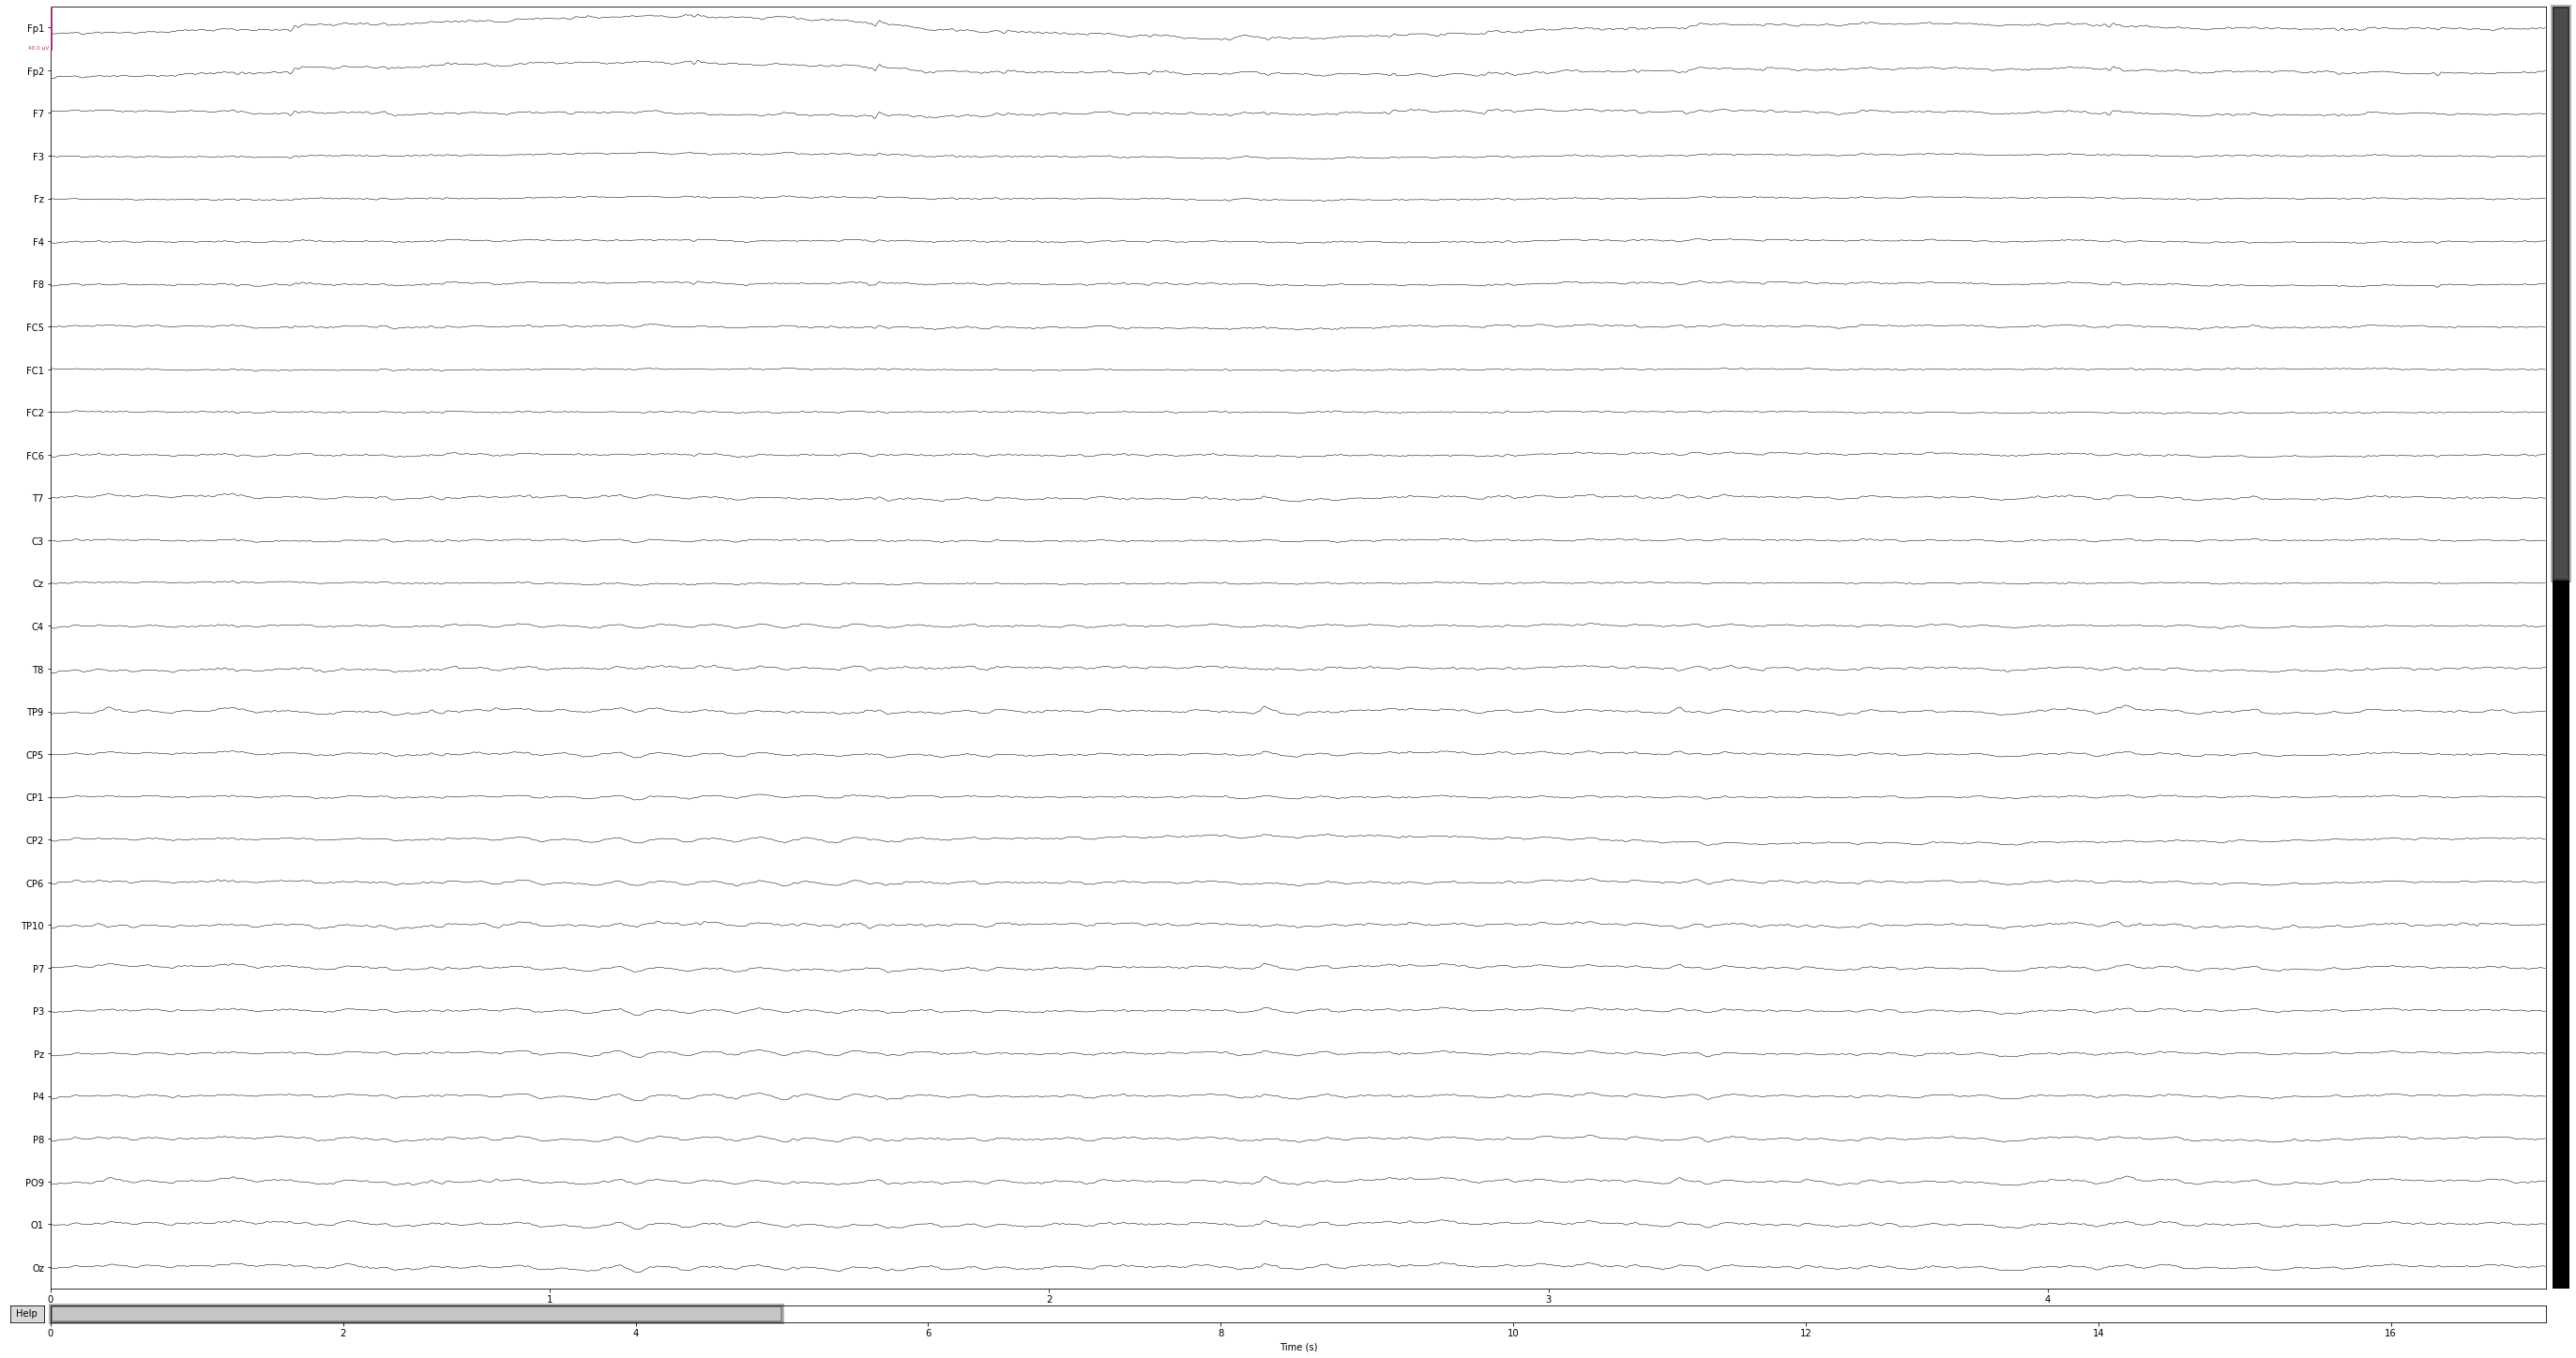

In [5]:
raw_eeg.plot_psd(fmax=50)
raw_eeg.plot(duration=5, n_channels=30)

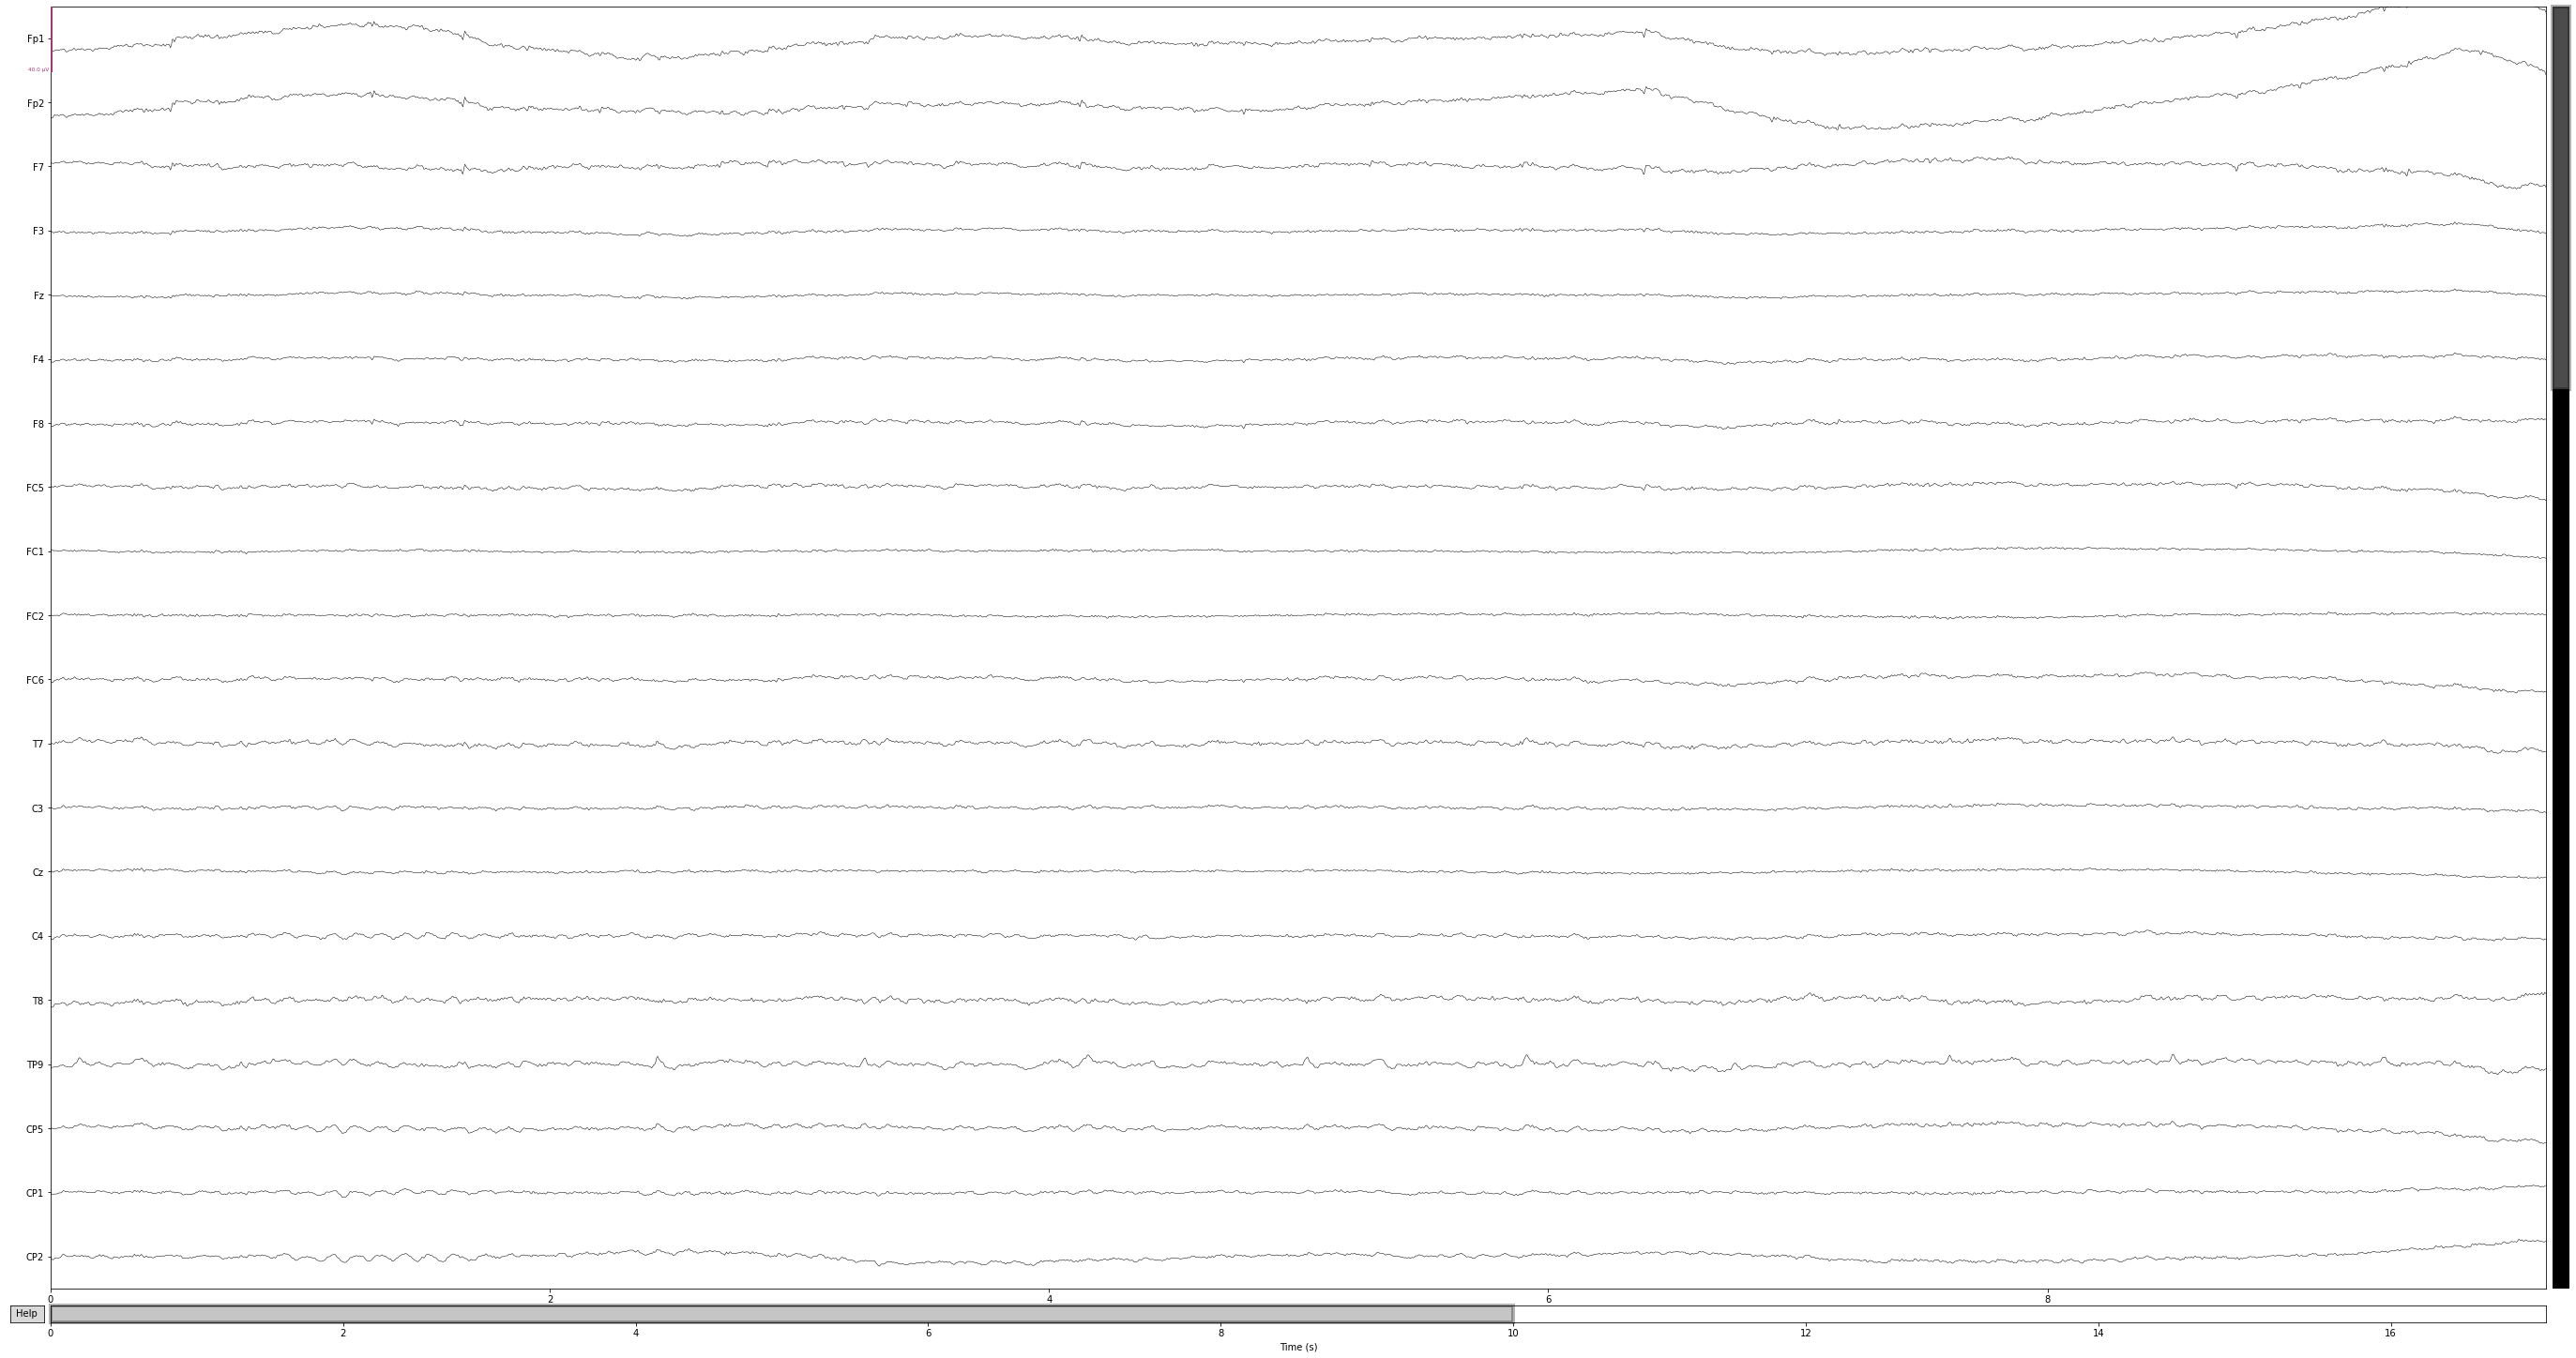

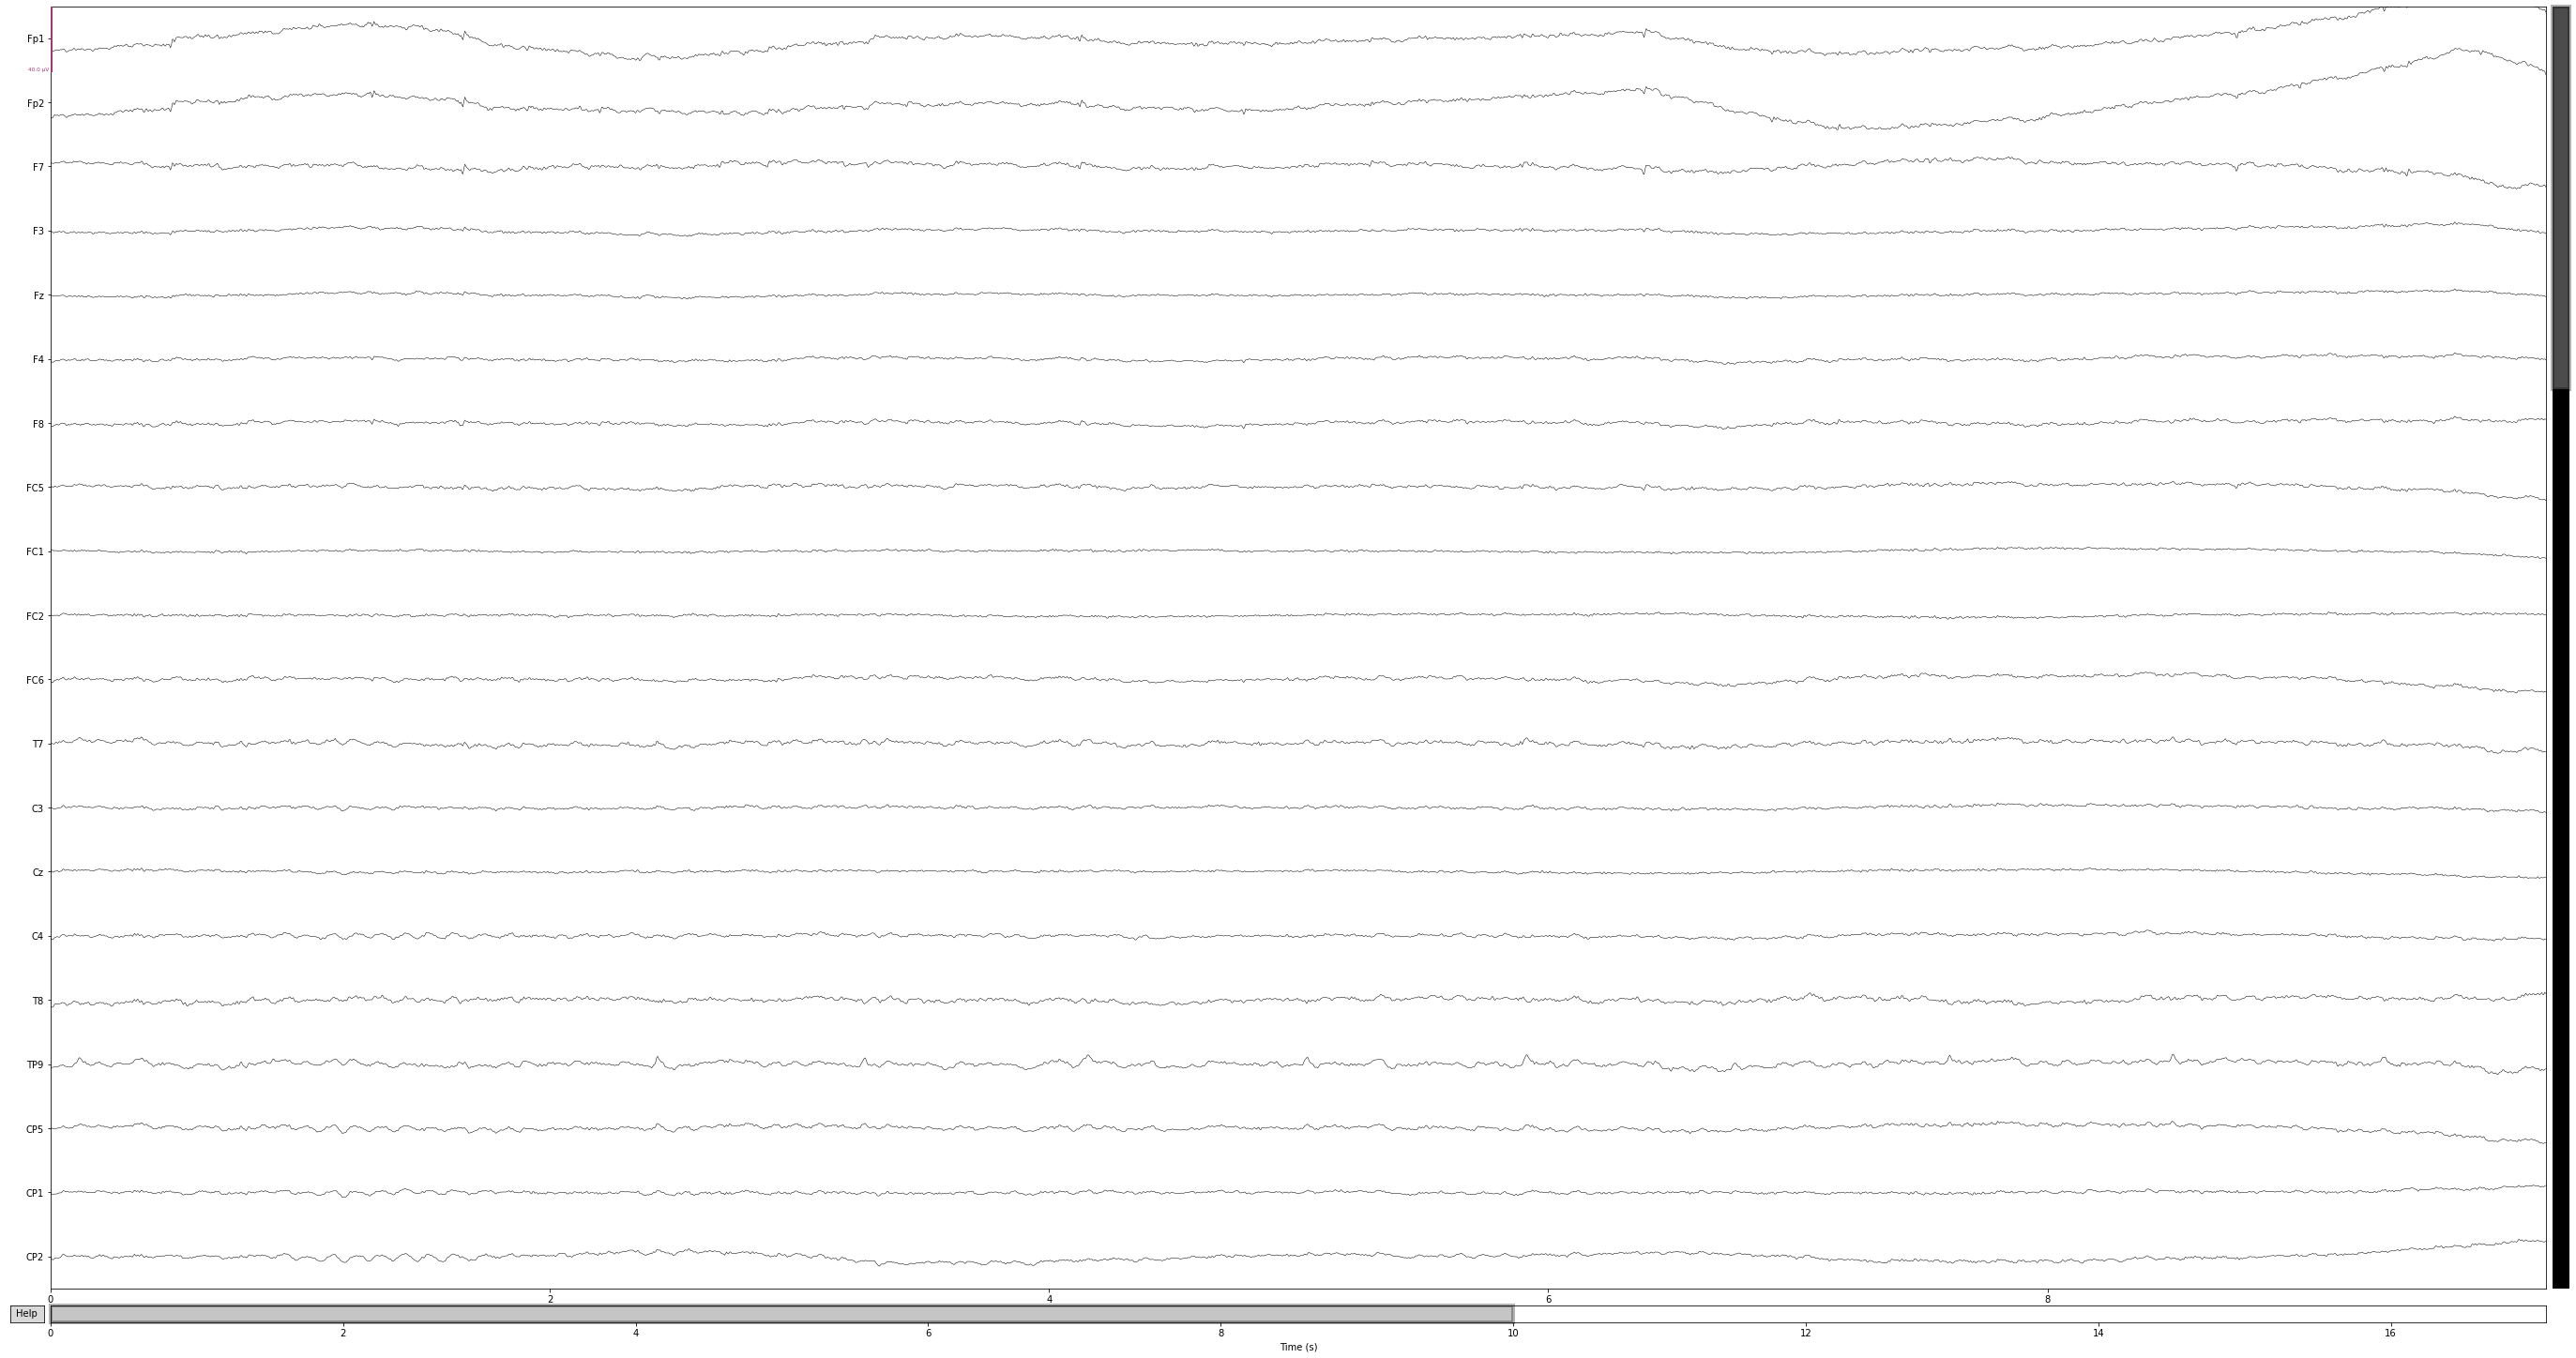

In [15]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw_eeg)
raw_eeg.load_data()
ica.apply(raw_eeg)
raw_eeg.plot()

In [17]:
reject_criteria = dict(mag=4000e-15,     # 4000 fT
                       grad=4000e-13,    # 4000 fT/cm
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV
epochs = mne.Epochs(raw_eeg)

TypeError: __init__() missing 1 required positional argument: 'events'